
## SimBoost


Drug discovery is a time-consuming, laborious, costly and high-risk process. According to a report by the Eastern Research Group (ERG), it usually takes 10-15 years to develop a new drug. However, the success rate of developing a new molecular entity is only 2.01%. \
Finding a compound that selectively binds to a particular protein is a highly challenging and typically expensive procedure in the drug development process. \
In this project we are going to implement [SimBoost](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5395521/#CR42) which is machine-learning approch for predicting drug–target binding affinities using gradient boosting.




We will be using [Davis](http://staff.cs.utu.fi/~aatapa/data/DrugTarget/) dataset, which contains selectivity assays of the kinase protein family and the relevant inhibitors with their respective dissociation constant (Kd) values. It comprises interactions of 442 proteins and 68 drugs.

## 1. Setup 

### 1.1 Imports libs

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### 1.2 Loading data

We need following files for this project:
- `target_gene_names.txt`: gene names of the targets
- `drug_PubChem_CIDs.txt`: PubChem CIDs of the drugs
- `drug-drug_similarities_2D.txt`: drug-drug structural fingerprint similarities computed the Structure Clustering sever at PubChem
- `target-target_similarities_WS_normalized.txt`: target-target sequence similarities computed with the normalized versions of the Smith-Waterman (SW) score.
- `drug-target_interaction_affinities_Kd__Davis_et_al.2011.txt`: drug-target interaction affinities.

The rows (and columns) of the drug-drug similarity matrices correspond to the rows of the interaction affinity matrix and the rows (and columns) of the target-target similarity matrices correspond to the columns of the interaction affinity matrix.

In [2]:
target_gene_names = pd.read_csv("target_gene_names.txt", header=None, index_col = 0)
drug_pubchemIDs = pd.read_csv("drug_PubChem_CIDs.txt", header=None, index_col = 0) #  dtype=str
#################################################################################
#                          COMPLETE THE FOLLOWING SECTION                       #
#################################################################################
# Load each file using pd.read_csv and use target_gene_names and drug_pubchemIDs
# to correspond row index and columns of all three files.
# sim_targets.shape == (442, 442)
# sim_drugs.shape == (68, 68)
# bindings.shape == (68, 442)
# Note that target_gene_names and drug_pubchemIDs dataframes are empty, we are
# going to fill them with features.
#################################################################################
f1,f2=open("target_gene_names.txt"),open("drug_PubChem_CIDs.txt")
id1,id2=[],[]
for i in f1:
    k=i.strip("\n")
    id1.append(k)
for i in f2:
    k=i.strip("\n")
    id2.append(int(k))
    
sim_targets=pd.read_csv("target-target_similarities_WS_normalized.txt",sep=" ",header=None,
                        names=id1)
sim_targets.index=id1

sim_drugs=pd.read_csv("drug-drug_similarities_2D.txt",sep=" ",header=None,
                        names=id2)
sim_drugs.index=id2

bindings=pd.read_csv("drug-target_interaction_affinities_Kd__Davis_et_al.2011.txt",sep=" ",header=None,
                        names=id1)
bindings.index=id2

#################################################################################
#                                   THE END                                     #
#################################################################################
sim_targets.shape, sim_drugs.shape, bindings.shape

((442, 442), (68, 68), (68, 442))

In [3]:
sim_targets

AAK1  ABL1(E255K)-phosphorylated  \
AAK1                           100.000000                   45.481928   
ABL1(E255K)-phosphorylated      45.481928                  100.000000   
ABL1(F317I)-nonphosphorylated   45.481928                  100.000000   
ABL1(F317I)-phosphorylated      45.481928                  100.000000   
ABL1(F317L)-nonphosphorylated   45.481928                  100.000000   
...                                   ...                         ...   
YES                             46.666667                   64.108352   
YSK1                            52.564103                   48.199446   
YSK4                            46.886447                   50.793651   
ZAK                             47.441860                   54.915254   
ZAP70                           50.000000                   60.350877   

                               ABL1(F317I)-nonphosphorylated  \
AAK1                                               45.481928   
ABL1(E255K)-phosphorylated                        100.000000   
ABL1(F317I)-nonphosphorylated                     100.000000   
ABL1(F317I)-phosphorylated                        100.000000   
ABL1(F317L)-nonphosphorylated                     100.000000   
...                                                      ...   
YES                                                64.108352   
YSK1                                               48.199446   
YSK4                                               50.793651   
ZAK                                                54.915254   
ZAP70                                              60.350877   

                               ABL1(F317I)-phosphorylated  \
AAK1                                            45.481928   
ABL1(E255K)-phosphorylated                     100.000000   
ABL1(F317I)-nonphosphorylated                  100.000000   
ABL1(F317I)-phosphorylated                     100.000000   
ABL1(F317L)-nonphosphorylated                  100.000000   
...                                                   ...   
YES                                             64.108352   
YSK1                                            48.199446   
YSK4                                            50.793651   
ZAK                                             54.915254   
ZAP70                                           60.350877   

                               ABL1(F317L)-nonphosphorylated  \
AAK1                                               45.481928   
ABL1(E255K)-phosphorylated                        100.000000   
ABL1(F317I)-nonphosphorylated                     100.000000   
ABL1(F317I)-phosphorylated                        100.000000   
ABL1(F317L)-nonphosphorylated                     100.000000   
...                                                      ...   
YES                                                64.108352   
YSK1                                               48.199446   
YSK4                                               50.793651   
ZAK                                                54.915254   
ZAP70                                              60.350877   

                               ABL1(F317L)-phosphorylated  \
AAK1                                            45.481928   
ABL1(E255K)-phosphorylated                     100.000000   
ABL1(F317I)-nonphosphorylated                  100.000000   
ABL1(F317I)-phosphorylated                     100.000000   
ABL1(F317L)-nonphosphorylated                  100.000000   
...                                                   ...   
YES                                             64.108352   
YSK1                                            48.199446   
YSK4                                            50.793651   
ZAK                                             54.915254   
ZAP70                                           60.350877   

                               ABL1(H396P)-nonphosphorylated  \
AAK1                                               45.481928   
ABL1(E255K)-phosphorylated  

### 1.3 Preprocessing

In davis dataset, standard value is Kd in nM. we used the transformation below:

### $pK_{d}=-log_{10}\frac{K_d}{1e9}$ 


In [4]:
drug_pubchemIDs.sort_index(inplace=True)
target_gene_names.sort_index(inplace=True)
#################################################################################
#                          COMPLETE THE FOLLOWING SECTION                       #
#################################################################################
# sort sim_targets, sim_drugs, bindings based on their index like above 
# divide all values of sim_targets by 100
# transform binding values as mentioned above
#################################################################################
bindings.sort_index(inplace=True)
sim_targets.sort_index(inplace=True)
sim_drugs.sort_index(inplace=True)

sim_targets = sim_targets/100
transformed_bindings = -np.log10(bindings/(10**9))

#################################################################################
#                                   THE END                                     #
#################################################################################
transformed_bindings.head()


AAK1  ABL1(E255K)-phosphorylated  ABL1(F317I)-nonphosphorylated  \
5291    5.000000                    6.769551                       8.080922   
44259   8.920819                    7.657577                       6.259637   
123631  5.000000                    6.397940                       5.000000   
126565  8.508638                    6.075721                       5.000000   
151194  5.000000                    5.000000                       5.000000   

        ABL1(F317I)-phosphorylated  ABL1(F317L)-nonphosphorylated  \
5291                      6.236572                       8.602060   
44259                     6.886057                       6.769551   
123631                    5.327902                       5.568636   
126565                    5.309804                       5.119186   
151194                    5.000000                       5.000000   

        ABL1(F317L)-phosphorylated  ABL1(H396P)-nonphosphorylated  \
5291                      6.958607                       8.229148   
44259                     7.337242                       7.744727   
123631                    6.107905                       6.167491   
126565                    5.657577                       6.000000   
151194                    5.000000                       5.000000   

        ABL1(H396P)-phosphorylated  ABL1(M351T)-phosphorylated  \
5291                      7.187087                    7.356547   
44259                     7.443697                    7.283997   
123631                    6.337242                    6.283997   
126565                    6.060481                    6.107905   
151194                    5.000000                    5.000000   

        ABL1(Q252H)-nonphosphorylated  ...      WEE1      WEE2     YANK1  \
5291                         8.744727  ...  5.000000  5.000000  5.000000   
44259                        7.677781  ...  5.795880  5.000000  7.886057   
123631                       5.958607  ...  5.000000  5.000000  5.000000   
126565                       5.602060  ...  5.920819  5.102373  5.677781   
151194                       5.000000  ...  5.000000  5.000000  5.000000   

           YANK2     YANK3       YES      YSK1      YSK4       ZAK     ZAP70  
5291    5.000000  5.000000  5.000000  5.000000  5.000000  5.585027  5.000000  
44259   7.008774  6.508638  7.283997  6.958607  9.065502  5.000000  7.356547  
123631  5.000000  5.000000  5.000000  5.000000  6.619789  5.000000  5.000000  
126565  5.229148  5.096910  6.795880  7.013228  9.283997  5.173925  7.795880  
151194  5.000000  5.000000  5.000000  5.000000  5.721246  5.356547  5.000000  

[5 rows x 442 columns]

(array([22754.,  2400.,  1869.,  1189.,   799.,   528.,   297.,   150.,
           47.,    23.]),
 array([ 5.        ,  5.579588  ,  6.159176  ,  6.73876401,  7.31835201,
         7.89794001,  8.47752801,  9.05711601,  9.63670401, 10.21629202,
        10.79588002]),
 <a list of 10 Patch objects>)

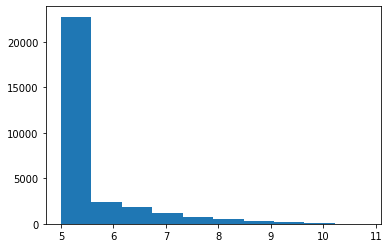

In [5]:
#################################################################################
#                          COMPLETE THE FOLLOWING SECTION                       #
#################################################################################
# Plot histogram of all values in transformed_bindings
# Hint: use .stack and .plot.hist  
#################################################################################

plt.hist(transformed_bindings.stack())
#################################################################################
#                                   THE END                                     #
#################################################################################

In [6]:
sim_drugs.sort_index(inplace=True)
sim_drugs.loc[5291,5291]

1.0

As you can see in histogram. The peak at pKd value 5 (10000 nM), These values correspond to the negative pairs that either have very weak binding affinities (Kd > 10000nM) or are not observed in the primary screen.

### 1.4 Drug-Target-Binding

In [7]:
#################################################################################
#                          COMPLETE THE FOLLOWING SECTION                       #
#################################################################################
# use drug_target_binding and build drug_target_binding dataframe 
# in each row of dataframe you must have one drug-target pair and their 
# transformed binding value, in the end you must have a dataframe with 
# 30056 row and 3 columns ['Drug', 'Target', 'Binding_Val']
#################################################################################
drug_target_binding = None
l=[]
for i in id1:
    for j in id2:
        k=transformed_bindings.loc[j,i]
        l2=[j,i,k]
        l.append(l2)
drug_target_binding=pd.DataFrame(l,columns=['Drug', 'Target', 'Binding_Val'])
drug_target_binding

#################################################################################
#                                   THE END                                     #
#################################################################################
drug_target_binding.head()

Drug Target  Binding_Val
0  11314340   AAK1     7.366532
1  24889392   AAK1     5.000000
2  11409972   AAK1     5.000000
3  11338033   AAK1     5.000000
4  10184653   AAK1     5.000000

### 1.5 Train, Validation and Test Datasets

In [8]:
#################################################################################
#                          COMPLETE THE FOLLOWING SECTION                       #
#################################################################################
# split drug_target_binding dataframe to 3 sets (train_data, val_data, test_data)
# split ratio is up to you
# at the end you must have 3 sets that each of them has 3 columns
#################################################################################
#drug_target_binding
train_data = None
val_data = None
test_data = None

train_data, x_remain = train_test_split(drug_target_binding, test_size=0.3)
val_data,test_data = train_test_split(x_remain, test_size=0.3)
    

#################################################################################
#                                   THE END                                     #
#################################################################################

print((train_data.shape[0]/drug_target_binding.shape[0]) * 100, "%")
print((val_data.shape[0]/drug_target_binding.shape[0]) * 100, "%")
print((test_data.shape[0]/drug_target_binding.shape[0]) * 100, "%")
train_data.shape, val_data.shape, test_data.shape

69.99933457545914 %
20.997471386744742 %
9.003194037796113 %


((21039, 3), (6311, 3), (2706, 3))

## 2.Feature Engineering 

In this part we are going to extract some feature for each target/drug. after that we will replace these features with their names/pubchemIDs. 

### 2.1 Average Similarities and Binding values

In [9]:
#################################################################################
#                          COMPLETE THE FOLLOWING SECTION                       #
#################################################################################
# for each target compute their average similarities in sim_targets matrix
# and average binding value (in train_data).
# add these two feature as 'avg-sim', 'avg-binding' to target_gene_names DataFrame
#################################################################################
for i in sim_targets:
    target_gene_names.loc[i,'t_avg-sim']=np.mean(sim_targets.loc[i,:])

target_bindingvals={}
for i in range(len(train_data)):
    x=train_data.iloc[i,:] #drug=x[0],target=x[1],binding_val=[2]
    if x[1] not in target_bindingvals:
        target_bindingvals[x[1]]=[x[2]]
    else:
        target_bindingvals[x[1]].append(x[2])
for i in target_bindingvals:
    target_gene_names.loc[i,'t_avg-binding']=np.mean(target_bindingvals[i])


#################################################################################
#                                   THE END                                     #
#################################################################################
target_gene_names.head()

t_avg-sim  t_avg-binding
0                                                      
AAK1                            0.479173       5.730920
ABL1(E255K)-phosphorylated      0.535796       6.165357
ABL1(F317I)-nonphosphorylated   0.535796       5.763820
ABL1(F317I)-phosphorylated      0.535796       5.537035
ABL1(F317L)-nonphosphorylated   0.535796       5.993138

In [10]:
#################################################################################
#                          COMPLETE THE FOLLOWING SECTION                       #
#################################################################################
# for each drug compute their average similarities in sim_drugs matrix
# and average binding value (in train_data).
# add these two feature as 'avg-sim', 'avg-binding' to drug_pubchemIDs DataFrame
#################################################################################
for i in sim_drugs:
    drug_pubchemIDs.loc[i,'d_avg-sim']=np.mean(sim_drugs.loc[i,:])

drug_bindingvals={}
for i in range(len(train_data)):
    x=train_data.iloc[i,:] #drug=x[0],target=x[1],binding_val=[2]
    if x[0] not in drug_bindingvals:
        drug_bindingvals[x[0]]=[x[2]]
    else:
        drug_bindingvals[x[0]].append(x[2])
for i in drug_bindingvals:
    drug_pubchemIDs.loc[i,'d_avg-binding']=np.mean(drug_bindingvals[i])



#################################################################################
#                                   THE END                                     #
#################################################################################
drug_pubchemIDs.head()

d_avg-sim  d_avg-binding
0                               
5291     0.615412       5.217772
44259    0.559441       7.186023
123631   0.608265       5.242399
126565   0.530206       6.802647
151194   0.558706       5.079370

### 2.2 Drug/Target Similarity Networks

#### 2.2.1 Build Networks

You must build two networks one for drugs and another one for targets. The nodes are drugs or targets, and an edge between two nodes exists if their similarity is above a threshold. The value of threshold is up to you. \
For building networks, we are going to use [igraph](https://igraph.org/) package. 

In [11]:
target_gene_names.loc[:,"t_avg-sim"].describe()

count    442.000000
mean       0.513932
std        0.016823
min        0.470291
25%        0.502483
50%        0.513756
75%        0.522358
max        0.576918
Name: t_avg-sim, dtype: float64

In [12]:
drug_pubchemIDs.loc[:,"d_avg-sim"].describe()

count    68.000000
mean      0.560357
std       0.048484
min       0.384779
25%       0.548750
50%       0.569963
75%       0.588982
max       0.617044
Name: d_avg-sim, dtype: float64

In [13]:
import igraph

In [14]:
sim_drugs=sim_drugs.reindex(sorted(sim_drugs.columns),axis=1) #sorting columns
sim_drugs

5291      44259     123631    126565    151194    153999    \
5291         1.000     0.604     0.584     0.570     0.637     0.665   
44259        0.604     1.000     0.524     0.890     0.504     0.756   
123631       0.584     0.524     1.000     0.472     0.598     0.523   
126565       0.570     0.890     0.472     1.000     0.479     0.729   
151194       0.637     0.504     0.598     0.479     1.000     0.576   
...            ...       ...       ...       ...       ...       ...   
25127112     0.613     0.496     0.515     0.478     0.653     0.591   
25243800     0.517     0.378     0.457     0.365     0.485     0.450   
42642645     0.558     0.583     0.778     0.531     0.510     0.594   
44150621     0.557     0.521     0.446     0.519     0.457     0.533   
51004351     0.601     0.973     0.512     0.883     0.490     0.742   

          156414    156422    176155    176167    ...  16725726  17755052  \
5291         0.620     0.550     0.660     0.735  ...     0.539     0.614   
44259        0.544     0.553     0.488     0.729  ...     0.511     0.537   
123631       0.887     0.686     0.537     0.509  ...     0.655     0.544   
126565       0.490     0.512     0.481     0.688  ...     0.488     0.503   
151194       0.595     0.575     0.632     0.618  ...     0.479     0.602   
...            ...       ...       ...       ...  ...       ...       ...   
25127112     0.513     0.527     0.668     0.617  ...     0.578     0.661   
25243800     0.449     0.455     0.518     0.469  ...     0.502     0.515   
42642645     0.720     0.659     0.478     0.586  ...     0.570     0.475   
44150621     0.473     0.486     0.493     0.552  ...     0.446     0.470   
51004351     0.536     0.540     0.481     0.724  ...     0.498     0.524   

          24180719  24779724  24889392  25127112  25243800  42642645  \
5291         0.639     0.617     0.550     0.613     0.517     0.558   
44259        0.527     0.494     0.548     0.496     0.378     0.583   
123631       0.540     0.535     0.610     0.515     0.457     0.778   
126565       0.514     0.476     0.541     0.478     0.365     0.531   
151194       0.620     0.695     0.469     0.653     0.485     0.510   
...            ...       ...       ...       ...       ...       ...   
25127112     0.626     0.722     0.519     1.000     0.581     0.448   
25243800     0.476     0.539     0.423     0.581     1.000     0.359   
42642645     0.464     0.468     0.598     0.448     0.359     1.000   
44150621     0.481     0.443     0.445     0.476     0.466     0.455   
51004351     0.520     0.487     0.540     0.489     0.372     0.586   

          44150621  51004351  
5291         0.557     0.601  
44259        0.521     0.973  
123631       0.446     0.512  
126565       0.519     0.883  
151194       0.457     0.490  
...            ...       ...  
25127112     0.476     0.489  
25243800     0.466     0.372  
42642645     0.455     0.586  
44150621     1.000     0.512  
51004351     0.512     1.000  

[68 rows x 68 columns]

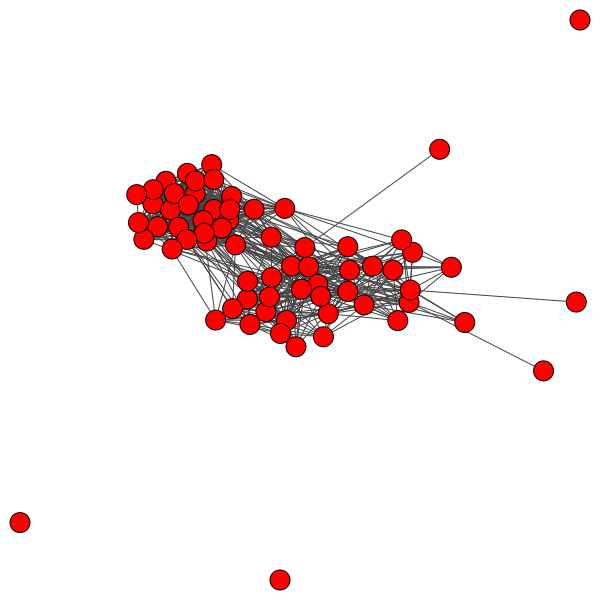

In [15]:
drug_sim_threshold = 0.6
adj=np.where(sim_drugs!=1 ,sim_drugs,0)
adj0=np.where(adj>drug_sim_threshold ,1,0)
drug_graph=igraph.Graph.Adjacency(adj0.tolist(),mode="undirected")
#drug_graph.simplify(loops=True)
igraph.plot(drug_graph, labels=True)

In [16]:
sim_targets

AAK1  ABL1(E255K)-phosphorylated  \
AAK1                           1.000000                    0.454819   
ABL1(E255K)-phosphorylated     0.454819                    1.000000   
ABL1(F317I)-nonphosphorylated  0.454819                    1.000000   
ABL1(F317I)-phosphorylated     0.454819                    1.000000   
ABL1(F317L)-nonphosphorylated  0.454819                    1.000000   
...                                 ...                         ...   
ZAP70                          0.500000                    0.603509   
p38-alpha                      0.507353                    0.497925   
p38-beta                       0.492647                    0.504348   
p38-delta                      0.507246                    0.495798   
p38-gamma                      0.512077                    0.500000   

                               ABL1(F317I)-nonphosphorylated  \
AAK1                                                0.454819   
ABL1(E255K)-phosphorylated                          1.000000   
ABL1(F317I)-nonphosphorylated                       1.000000   
ABL1(F317I)-phosphorylated                          1.000000   
ABL1(F317L)-nonphosphorylated                       1.000000   
...                                                      ...   
ZAP70                                               0.603509   
p38-alpha                                           0.497925   
p38-beta                                            0.504348   
p38-delta                                           0.495798   
p38-gamma                                           0.500000   

                               ABL1(F317I)-phosphorylated  \
AAK1                                             0.454819   
ABL1(E255K)-phosphorylated                       1.000000   
ABL1(F317I)-nonphosphorylated                    1.000000   
ABL1(F317I)-phosphorylated                       1.000000   
ABL1(F317L)-nonphosphorylated                    1.000000   
...                                                   ...   
ZAP70                                            0.603509   
p38-alpha                                        0.497925   
p38-beta                                         0.504348   
p38-delta                                        0.495798   
p38-gamma                                        0.500000   

                               ABL1(F317L)-nonphosphorylated  \
AAK1                                                0.454819   
ABL1(E255K)-phosphorylated                          1.000000   
ABL1(F317I)-nonphosphorylated                       1.000000   
ABL1(F317I)-phosphorylated                          1.000000   
ABL1(F317L)-nonphosphorylated                       1.000000   
...                                                      ...   
ZAP70                                               0.603509   
p38-alpha                                           0.497925   
p38-beta                                            0.504348   
p38-delta                                           0.495798   
p38-gamma                                           0.500000   

                               ABL1(F317L)-phosphorylated  \
AAK1                                             0.454819   
ABL1(E255K)-phosphorylated                       1.000000   
ABL1(F317I)-nonphosphorylated                    1.000000   
ABL1(F317I)-phosphorylated                       1.000000   
ABL1(F317L)-nonphosphorylated                    1.000000   
...                                                   ...   
ZAP70                                            0.603509   
p38-alpha                                        0.497925   
p38-beta                                         0.504348   
p38-delta                                        0.495798   
p38-gamma                                        0.500000   

                               ABL1(H396P)-nonphosphorylated  \
AAK1                                                0.454819   
ABL1(E255K)-phosphorylated                        

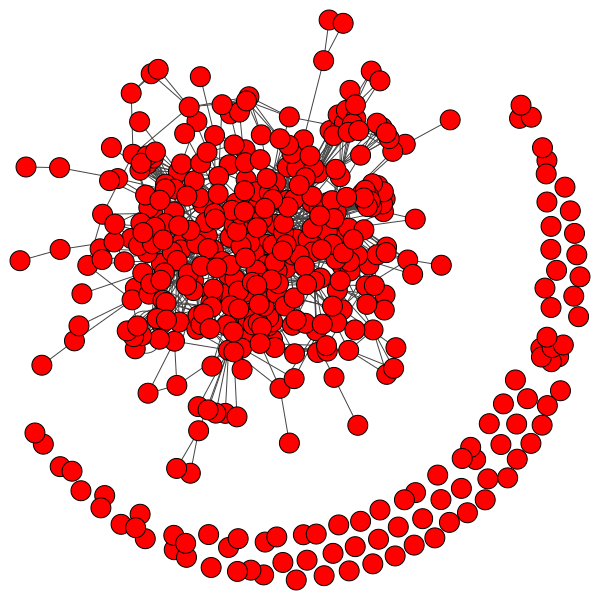

In [18]:
target_sim_threshold = 0.7
adj1=np.where(sim_targets!=1 ,sim_targets,0)
adj2=np.where(adj1>target_sim_threshold ,1,0)
target_graph=igraph.Graph.Adjacency(adj2.tolist(),mode="undirected")
drug_graph.simplify(loops=False)
igraph.plot(target_graph, labels=True)

In [21]:
#################################################################################
#                          COMPLETE THE FOLLOWING SECTION                       #
#################################################################################
# define drug_sim_threshold, target_sim_threshold and use these values to
# build two network one for drugs and another one for targets using sim_drugs
# and sim_targets.
# Hint: you can use igraph.Graph.Adjacency, you can plot your graph using 
# igraph.plot
#################################################################################
drug_sim_threshold = 0.6
target_sim_threshold = 0.6

drug_graph = igraph.Graph()
target_graph = igraph.Graph()

drug_graph.add_vertices(len(sim_drugs))
target_graph.add_vertices(len(sim_targets))

for i, drug_1 in enumerate(sim_drugs):
    for j, drug_2 in enumerate(sim_drugs):
        if (sim_drugs.loc[drug_1,drug_2] > drug_sim_threshold) and (drug_1!=drug_2) :
            drug_graph.add_edges([(i, j)])

for i, tar_1 in enumerate(sim_targets):
    for j, tar_2 in enumerate(sim_targets):
        if (sim_targets.loc[tar_1,tar_2] > target_sim_threshold) and (tar_1!=tar_2):
            target_graph.add_edges([(i, j)])


#################################################################################
#                                   THE END                                     #
#################################################################################

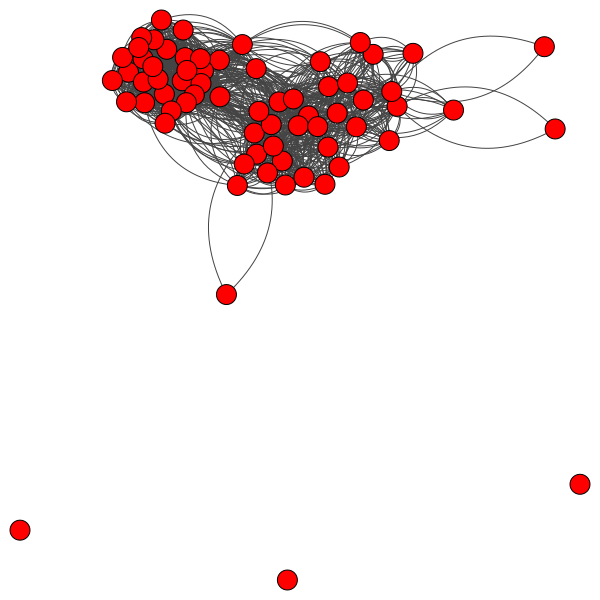

In [22]:
igraph.plot(drug_graph)

In [24]:
igraph.plot(target_graph)

Explain how you choose your threshold values? \
**Your Answer**


با توجه به میزان شباهت ها در  تارگت و دراگها میبینیم در ستون میانگین شباهت ها میزان میانگین و ماکزیمم در تارگت0.51 و0.57است و در دراگ این مقدار ها0.56و0.61است بدیت ترتیب حد استانه ی مطلوب نزدیک به این اعداد است و با رسم گراهای متعدد و مشاهده ی نتایج ترشهولدهای 0.6و0.6 انتخاب شدند.)

#### 2.2.2 Number of neighbors, PageRank

In [25]:
#################################################################################
#                          COMPLETE THE FOLLOWING SECTION                       #
#################################################################################
# for each drug compute number of neighbors and it's PageRank sco re. 
# add these two feature as 'n_neighbors', 'page_rank' to drug_pubchemIDs DataFrame.
# do the above for each target too and add them to target_gene_names DataFrame.
# Hint: for pagerank score you can use graph.pagerank.
#################################################################################

for vertex in target_graph.vs:
    target_gene_names.loc[sorted(id1)[vertex.index], 't_n_neighbors'] = target_graph.neighborhood_size(vertex,mindist=1)
    target_gene_names.loc[sorted(id1)[vertex.index], 't_page_rank'] = target_graph.pagerank(vertex)


for vertex in drug_graph.vs:
    drug_pubchemIDs.loc[sorted(id2)[vertex.index], 'd_n_neighbors'] = drug_graph.neighborhood_size(vertex,mindist=1)
    drug_pubchemIDs.loc[sorted(id2)[vertex.index], 'd_page_rank'] = drug_graph.pagerank(vertex)


#################################################################################
#                                   THE END                                     #
#################################################################################
target_gene_names.head()


t_avg-sim  t_avg-binding  t_n_neighbors  \
0                                                                        
AAK1                            0.479173       5.730920            1.0   
ABL1(E255K)-phosphorylated      0.535796       6.165357           81.0   
ABL1(F317I)-nonphosphorylated   0.535796       5.763820           81.0   
ABL1(F317I)-phosphorylated      0.535796       5.537035           81.0   
ABL1(F317L)-nonphosphorylated   0.535796       5.993138           81.0   

                               t_page_rank  
0                                           
AAK1                              0.000411  
ABL1(E255K)-phosphorylated        0.003652  
ABL1(F317I)-nonphosphorylated     0.003652  
ABL1(F317I)-phosphorylated        0.003652  
ABL1(F317L)-nonphosphorylated     0.003652

In [26]:
drug_pubchemIDs

d_avg-sim  d_avg-binding  d_n_neighbors  d_page_rank
0                                                             
5291       0.615412       5.217772           35.0     0.019692
44259      0.559441       7.186023           11.0     0.012669
123631     0.608265       5.242399           29.0     0.015846
126565     0.530206       6.802647            8.0     0.011651
151194     0.558706       5.079370           16.0     0.013664
...             ...            ...            ...          ...
25127112   0.553456       5.368016           18.0     0.014382
25243800   0.465912       5.714403            0.0     0.008617
42642645   0.573956       6.161129           24.0     0.014365
44150621   0.494618       5.666576            1.0     0.009046
51004351   0.550956       5.707580           11.0     0.012669

[68 rows x 4 columns]

### 2.3 Non-negative Matrix Factorization

For extracting features from binding affinity matrix we are going to use [Non-negative Matrix Factorization](https://en.wikipedia.org/wiki/Non-negative_matrix_factorization). 

In NMF, we are trying to approximately factor a matrix $B ∈ R_+^{d×t}$ (binding affinity matrix of d drugs and t targets) into two matrices $P ∈ R_+^{k×d}$ and $Q ∈ R_+^{k×t}$ which  $B = P^TQ$

In this problem, you can set $k$ (Latent dimension of $P$ and $Q$ matrices) to any number below 10.


The columns of the factor matrices P and Q are utilized as parts of the feature vectors for the drugs and targets respectively.

In [27]:
from sklearn.decomposition import NMF

In [28]:
#################################################################################
#                          COMPLETE THE FOLLOWING SECTION                       #
#################################################################################
# define latent_dim variable, after that use train_data to build bindings matrix
# because we remove some of the bindings values when we choose train_data in part 1.5  
# your matrix will have some na values fill them with 5 (Which is lowest binding score).
#################################################################################
latent_dim = 3
train_binding_matrix = None
train_binding_matrix=pd.DataFrame(columns=sorted(id1),index=sorted(id2))#empty dataframe

for i in range(len(train_data)):
    x=train_data.iloc[i,:] #drug=x[0],target=x[1],binding_val=x[2]
    train_binding_matrix.loc[x[0],x[1]]=x[2]

train_binding_matrix=train_binding_matrix.fillna(5)

#################################################################################
#                                   THE END                                     #
#################################################################################
train_binding_matrix.head()


AAK1  ABL1(E255K)-phosphorylated  ABL1(F317I)-nonphosphorylated  \
5291    5.000000                    6.769551                       8.080922   
44259   8.920819                    5.000000                       5.000000   
123631  5.000000                    5.000000                       5.000000   
126565  8.508638                    5.000000                       5.000000   
151194  5.000000                    5.000000                       5.000000   

        ABL1(F317I)-phosphorylated  ABL1(F317L)-nonphosphorylated  \
5291                      6.236572                       8.602060   
44259                     5.000000                       6.769551   
123631                    5.327902                       5.000000   
126565                    5.309804                       5.119186   
151194                    5.000000                       5.000000   

        ABL1(F317L)-phosphorylated  ABL1(H396P)-nonphosphorylated  \
5291                      6.958607                       8.229148   
44259                     7.337242                       5.000000   
123631                    6.107905                       6.167491   
126565                    5.657577                       6.000000   
151194                    5.000000                       5.000000   

        ABL1(H396P)-phosphorylated  ABL1(M351T)-phosphorylated  \
5291                      7.187087                    7.356547   
44259                     7.443697                    7.283997   
123631                    5.000000                    5.000000   
126565                    5.000000                    6.107905   
151194                    5.000000                    5.000000   

        ABL1(Q252H)-nonphosphorylated  ...    YANK3      YES      YSK1  \
5291                         5.000000  ...  5.00000  5.00000  5.000000   
44259                        7.677781  ...  5.00000  5.00000  6.958607   
123631                       5.958607  ...  5.00000  5.00000  5.000000   
126565                       5.602060  ...  5.09691  6.79588  7.013228   
151194                       5.000000  ...  5.00000  5.00000  5.000000   

            YSK4       ZAK     ZAP70  p38-alpha  p38-beta  p38-delta  \
5291    5.000000  5.000000  5.000000        5.0       5.0   5.000000   
44259   9.065502  5.000000  7.356547        5.0       5.0   5.000000   
123631  5.000000  5.000000  5.000000        5.0       5.0   5.000000   
126565  9.283997  5.173925  7.795880        5.0       5.0   5.455932   
151194  5.721246  5.356547  5.000000        5.0       5.0   5.000000   

        p38-gamma  
5291     5.000000  
44259    5.000000  
123631   5.000000  
126565   6.431798  
151194   5.000000  

[5 rows x 442 columns]

In [29]:
#################################################################################
#                          COMPLETE THE FOLLOWING SECTION                       #
#################################################################################
# Use sklearn NMF and factor 'train_binding_matrix' to P and Q.
# add columns of P and Q as features to 'drug_pubchemIDs' and 'target_gene_names'
#################################################################################

model = NMF(n_components=latent_dim, init='random', random_state=0)
P = model.fit_transform(train_binding_matrix)
Q = model.components_

for idx,x in enumerate(sorted(id2)):
    drug_pubchemIDs.loc[x,"d_features1"]=P[idx][0]
    drug_pubchemIDs.loc[x,"d_features2"]=P[idx][1] 
    drug_pubchemIDs.loc[x,"d_features3"]=P[idx][2]
#drug_pubchemIDs

for idx,x in enumerate(sorted(id1)):
    target_gene_names.loc[x,"t_features1"]=Q.T[idx][0]
    target_gene_names.loc[x,"t_features2"]=Q.T[idx][1]
    target_gene_names.loc[x,"t_features3"]=Q.T[idx][2]
#target_gene_names

#################################################################################
#                                   THE END                                     #
#################################################################################
target_gene_names.head()
target_gene_names

t_avg-sim  t_avg-binding  t_n_neighbors  \
0                                                                        
AAK1                            0.479173       5.730920            1.0   
ABL1(E255K)-phosphorylated      0.535796       6.165357           81.0   
ABL1(F317I)-nonphosphorylated   0.535796       5.763820           81.0   
ABL1(F317I)-phosphorylated      0.535796       5.537035           81.0   
ABL1(F317L)-nonphosphorylated   0.535796       5.993138           81.0   
...                                  ...            ...            ...   
ZAP70                           0.517459       5.222569           44.0   
p38-alpha                       0.516549       5.300775           31.0   
p38-beta                        0.509405       5.276236           11.0   
p38-delta                       0.500495       5.130207            5.0   
p38-gamma                       0.517998       5.067407           46.0   

                               t_page_rank  t_features1  t_features2  \
0                                                                      
AAK1                              0.000411     2.346728     0.407639   
ABL1(E255K)-phosphorylated        0.003652     0.073737     1.664444   
ABL1(F317I)-nonphosphorylated     0.003652     0.000000     1.879513   
ABL1(F317I)-phosphorylated        0.003652     0.799698     1.655137   
ABL1(F317L)-nonphosphorylated     0.003652     0.211481     1.602011   
...                                    ...          ...          ...   
ZAP70                             0.002182     1.628914     1.012610   
p38-alpha                         0.002709     0.575532     1.757716   
p38-beta                          0.001322     0.937064     1.611369   
p38-delta                         0.000785     1.035126     1.362684   
p38-gamma                         0.002247     1.200198     1.467598   

                               t_features3  
0                                           
AAK1                              0.619853  
ABL1(E255K)-phosphorylated        2.799697  
ABL1(F317I)-nonphosphorylated     2.465049  
ABL1(F317I)-phosphorylated        1.392962  
ABL1(F317L)-nonphosphorylated     2.602192  
...                                    ...  
ZAP70                             0.708930  
p38-alpha                         1.475259  
p38-beta                          1.062239  
p38-delta                         1.137600  
p38-gamma                         0.730058  

[442 rows x 7 columns]

In [30]:
drug_pubchemIDs

d_avg-sim  d_avg-binding  d_n_neighbors  d_page_rank  d_features1  \
0                                                                             
5291       0.615412       5.217772           35.0     0.019692     1.505927   
44259      0.559441       7.186023           11.0     0.012669     3.124280   
123631     0.608265       5.242399           29.0     0.015846     1.581214   
126565     0.530206       6.802647            8.0     0.011651     2.956604   
151194     0.558706       5.079370           16.0     0.013664     1.691378   
...             ...            ...            ...          ...          ...   
25127112   0.553456       5.368016           18.0     0.014382     2.033873   
25243800   0.465912       5.714403            0.0     0.008617     1.763456   
42642645   0.573956       6.161129           24.0     0.014365     1.620815   
44150621   0.494618       5.666576            1.0     0.009046     1.990591   
51004351   0.550956       5.707580           11.0     0.012669     2.224780   

          d_features2  d_features3  
0                                   
5291         1.348737     1.439311  
44259        0.923118     1.234442  
123631       1.792559     0.851303  
126565       0.933953     1.099481  
151194       1.339775     1.121334  
...               ...          ...  
25127112     1.395771     0.808406  
25243800     1.619990     1.171607  
42642645     0.921837     2.431969  
44150621     0.924025     1.612947  
51004351     1.111263     1.125047  

[68 rows x 7 columns]

### 2.4 Building Train, Validation and Test Dataset using extracted features

In [31]:
drug_target_binding

Drug Target  Binding_Val
0      11314340   AAK1     7.366532
1      24889392   AAK1     5.000000
2      11409972   AAK1     5.000000
3      11338033   AAK1     5.000000
4      10184653   AAK1     5.000000
...         ...    ...          ...
30051   5494449  ZAP70     5.000000
30052   3038525  ZAP70     5.000000
30053   3081361  ZAP70     5.000000
30054   9809715  ZAP70     5.455932
30055    151194  ZAP70     5.000000

[30056 rows x 3 columns]

In [32]:
#################################################################################
#                          COMPLETE THE FOLLOWING SECTION                       #
#################################################################################
# Replace drug pubchemID and Target gene name with extracted features.
# and build X (drug and target features) and Y (binding_values) for each dataset
# (Train, Validation, Test)
#################################################################################
rows_list=[]
for i in id1:#id1=list of target names
    for j in id2:#id2=list of drug names
        d_row=drug_pubchemIDs.loc[j,:].tolist()
        t_row=target_gene_names.loc[i,:].tolist()
        rows_list.append(t_row+d_row)

X=pd.DataFrame(rows_list,columns=['d_avg-sim' ,'d_avg-binding', 'd_n_neighbors' ,'d_page_rank','d_features1' ,'d_features2', 'd_features3','t_avg-sim' ,'t_avg-binding', 't_n_neighbors' ,'t_page_rank','t_features1' ,'t_features2', 't_features3'])
Y=drug_target_binding.loc[:,"Binding_Val"]

train_ratio = 0.7
val_ratio = 0.1
test_ratio = 0.2

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1 - train_ratio)

X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size=test_ratio/(test_ratio + val_ratio)) 


#################################################################################
#                                   THE END                                     #
#################################################################################
X_train.shape, Y_train.shape, X_val.shape, Y_val.shape, X_test.shape, Y_test.shape

((21039, 14), (21039,), (3005, 14), (3005,), (6012, 14), (6012,))

## 3.XGboost 

To predict the continuous binding affinity for drug–target pairs, we will use [XGBoost](https://xgboost.readthedocs.io/en/latest/) library. 

You need to tune following hyperparameters:
- `learning_rate`: Boosting learning rate
- `n_estimators`: Number of gradient boosted trees.
- `max_depth `: Maximum tree depth for base learners.
- `colsample_bytree`: Subsample ratio of columns when constructing each tree.
- `subsample`: Subsample ratio of the training instance.




Note: `drug_sim_threshold`, `target_sim_threshold` and `latent_dim` in Feature Engineering part can be viewed as hyperparameters too.

In [33]:
import xgboost
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

model = xgboost.XGBRegressor()

param_grid ={
        'learning_rate': np.arange(0.0005,0.3,0.0005),
        'n_estimators':[5,10,15,20,30,40,50,60,70,80,200],
        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12,14,16,20],
        'colsample_bytree': np.arange(0.1,1.0,0.01),
        'subsample': np.arange(0.01,1.0,0.01)}

grid_search = RandomizedSearchCV(model, param_grid,random_state=0,cv=5, n_iter=10)
grid_result = grid_search.fit(X_train,Y_train)

print("best parameters are:")
grid_result.best_params_



best parameters are:


{'subsample': 0.62,
 'n_estimators': 60,
 'max_depth': 16,
 'learning_rate': 0.17450000000000002,
 'colsample_bytree': 0.7199999999999996}

### 3.1 Tune Hyperparameters

In [34]:
def plot_model_results(results):
    epochs = len(results['validation_0']['rmse'])
    x_axis = range(0, epochs)
    fig, ax = plt.subplots()
    ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
    ax.plot(x_axis, results['validation_1']['rmse'], label='Validation')
    ax.legend()
    plt.ylabel('RMSE')
    plt.show()

[17:52:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
Validation RMSE: 0.548


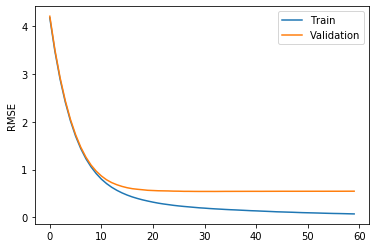

In [35]:
#################################################################################
#                          COMPLETE THE FOLLOWING SECTION                       #
#################################################################################
# Tune hyperparameters values and train model using .fit with Train data
# you can use l1 and l2 regularization terms too
# after training calculate Root Mean Square Error (RMSE) for validation data
#################################################################################
learning_rate =grid_result.best_params_['learning_rate']
n_estimators =grid_result.best_params_['n_estimators']
max_depth =grid_result.best_params_['max_depth']
colsample_bytree =grid_result.best_params_['colsample_bytree']
subsample = grid_result.best_params_['subsample']

model = xgboost.XGBRegressor(objective ='reg:linear', learning_rate = learning_rate, 
                             colsample_bytree = colsample_bytree,
                             max_depth = max_depth, 
                             subsample = subsample, 
                             n_estimators = n_estimators,
                             eval_metric='rmse')

model.fit(X_train,Y_train, eval_metric="rmse", 
          eval_set=[(X_train, Y_train), (X_val, Y_val)],
          verbose=False)

validation_rmse = mean_squared_error(Y_val,model.predict(X_val))**0.5
#################################################################################
#                                   THE END                                     #
#################################################################################
print("Validation RMSE: %.3f" % validation_rmse)
plot_model_results(model.evals_result())

### 3.2 Ploting Feature importance

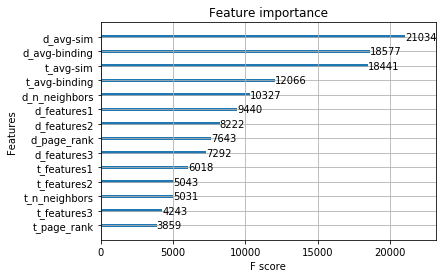

In [36]:
xgboost.plot_importance(model);

### 3.2 Evaluation

Let's make our perdiction binary. either a drug is binded to target or not, use $pK_d$ > 7 threshold as binded (drug-target) pair.

In [37]:
from sklearn.metrics import confusion_matrix
#################################################################################
#                          COMPLETE THE FOLLOWING SECTION                       #
#################################################################################
# Calculate RMSE for Test data. after that
# Calculate accuracy, precision, recall, f1-score for X_test
# for binary prediction setting. you can use confution_matrix from sklearn
#################################################################################

y_true=np.where(Y_test>7,1,0)
y_pred=np.where(model.predict(X_test)>7,1,0)

tn, fp, fn, tp =confusion_matrix(y_true,y_pred).ravel()
tn, fp, fn, tp


test_rmse = mean_squared_error(Y_test,model.predict(X_test))**0.5
test_acc =(tp+tn)/(tp+tn+fn+fp)
test_percision = tp/(tp+fp)
test_recall = tp/(tp+fn)
test_f1 = (2*test_percision*test_recall)/(test_percision+test_recall)

#################################################################################
#                                   THE END                                     #
#################################################################################
print("Test RMSE: %.3f" % test_rmse)
print("Test Accuracy: %.3f" % test_acc)
print("Test Percision: %.3f" % test_percision)
print("Test Recall: %.3f" % test_recall)
print("Test F1-Score: %.3f" % test_f1)

Test RMSE: 0.526
Test Accuracy: 0.954
Test Percision: 0.776
Test Recall: 0.577
Test F1-Score: 0.662


## 4.Classification 

Change Binding values to binary values with threshold $pK_d$ > 7 
and use X_train to train any Classifier method that you like.\
Report `accuracy`, `precision`, `recall`, `f1-score` for X_test. 



# using DecisionTreeClassifier for classification


In [40]:
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint

y_training=np.where(Y_train>7,1,0)
y_testing=np.where(Y_test>7,1,0)


Tree_model =DecisionTreeClassifier()

param ={"max_depth": [2,3,4,5,6,7,8,9,10,11,12],
              "max_features": randint(1, 10),
              "min_samples_leaf": randint(1, 10),
              "criterion": ["gini", "entropy"]}

grid_search = RandomizedSearchCV(Tree_model, param,random_state=0,cv=10, n_iter=40)
grid_result = grid_search.fit(X_train,y_training)

c=grid_result.best_params_
max_depth=c['max_depth']
max_features=c['max_features']
min_samples_leaf=c['min_samples_leaf']
criterion=c['criterion']
#min_samples_split=c['min_samples_split']

best_model=DecisionTreeClassifier(max_depth=max_depth,max_features=max_features
                                  ,min_samples_leaf=min_samples_leaf,criterion=criterion)
                                  



best_model.fit(X_train,y_training)

predictions = best_model.predict(X_test)
Tn, Fp, Fn, Tp =confusion_matrix(y_testing,predictions).ravel()


testt_acc =(Tp+Tn)/(Tp+Tn+Fn+Fp)
testt_percision = Tp/(Tp+Fp)
testt_recall = Tp/(Tp+Fn)
testt_f1 = (2*testt_percision*testt_recall)/(testt_percision+testt_recall)
print("Test Accuracy: %.3f" % testt_acc)
print("Test Percision: %.3f" % testt_percision)
print("Test Recall: %.3f" % testt_recall)
print("Test F1-Score: %.3f" % testt_f1)


Test Accuracy: 0.938
Test Percision: 0.644
Test Recall: 0.512
Test F1-Score: 0.571


# using randomforest for classification

In [86]:
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint




best_model= RandomForestClassifier(n_estimators=90)
best_model.fit(X_train,y_training)

predictions = best_model.predict(X_test)
Tn, Fp, Fn, Tp =confusion_matrix(y_testing,predictions).ravel()


testt_acc =(Tp+Tn)/(Tp+Tn+Fn+Fp)
testt_percision = Tp/(Tp+Fp)
testt_recall = Tp/(Tp+Fn)
testt_f1 = (2*testt_percision*testt_recall)/(testt_percision+testt_recall)
print("Test Accuracy: %.3f" % testt_acc)
print("Test Percision: %.3f" % testt_percision)
print("Test Recall: %.3f" % testt_recall)
print("Test F1-Score: %.3f" % testt_f1)


Test Accuracy: 0.952
Test Percision: 0.829
Test Recall: 0.502
Test F1-Score: 0.625


# using perceptron for classification

In [96]:
from sklearn.linear_model import Perceptron
from sklearn.svm import LinearSVC
from scipy.stats import randint


best_model=Perceptron(random_state=0)
                                  
best_model.fit(X_train,y_training)

predictions = best_model.predict(X_test)
Tn, Fp, Fn, Tp =confusion_matrix(y_testing,predictions).ravel()


testt_acc =(Tp+Tn)/(Tp+Tn+Fn+Fp)
testt_percision = Tp/(Tp+Fp)
testt_recall = Tp/(Tp+Fn)
testt_f1 = (2*testt_percision*testt_recall)/(testt_percision+testt_recall)
print("Test Accuracy: %.3f" % testt_acc)
print("Test Percision: %.3f" % testt_percision)
print("Test Recall: %.3f" % testt_recall)
print("Test F1-Score: %.3f" % testt_f1)


Test Accuracy: 0.913
Test Percision: 0.463
Test Recall: 0.517
Test F1-Score: 0.488
